In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from core.data.data_utils import *

## Nonlinear Regression

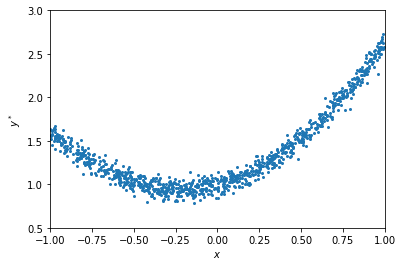

In [2]:
data = generate_data_for_regression() # Generates 1000 (x,y*) points

### Exercise
Train a two layer neural network with sigmoid activation functions to approximate the nonlinear function depicted in the figure.

### Initialization

In [7]:
m = 100 # Batch size
learning_rate = 0.1
n1 = 10 # Number of neurons in the hidden layer
n2 = 1  # Number of neurons in the output layer (equal to the output dim)

# Initialization of parameters
W1 = np.random.normal(loc=0, scale=0.1, size=(n1, 1))  # Input dim = 1
b1 = np.zeros((n1, 1))
W2 = np.random.normal(loc=0, scale=0.1, size=(n2, n1))
b2 = np.zeros((n2, 1))

In [8]:
def sigmoid(q, compute_derivative=False):
    y = 1/(1 + np.exp(-q))
    dydq = 0
    if(compute_derivative):
        dydq = y*(1 - y)
    return y, dydq

def linear(q, compute_derivative=False):
    y = q
    dydq = 0
    if(compute_derivative):
        dydq = np.ones_like(q)
    return y, dydq

def loss(y, y_star, compute_derivative=False):
    l = 0.5*(y_star - y)**2
    dldy = 0
    if(compute_derivative):
        dldy = -(y_star - y)
    return l, dldy

In [9]:
num_epochs = 5000
for e in range(num_epochs):
    batches = generate_training_batches(data, batch_size=m)
    
    for b in batches:
        X = b[:, 0].reshape(1, m)
        Y_star = b[:, 1].reshape(n2, m)
        ones_m = np.ones((X.shape[1], 1))
        
        Q1 = np.dot(W1, X) + np.dot(b1, ones_m.T)
        Y1, dY1dQ1 = sigmoid(Q1, compute_derivative=True)
        
        Q2 = np.dot(W2, Y1) + np.dot(b2, ones_m.T)
        Y2, dY2dQ2 = linear(Q2, compute_derivative=True)
        
        L, dLdY2 = loss(Y2, Y_star, compute_derivative=True)
        
        Phi2 = dLdY2 * dY2dQ2
        dLdY1 = np.dot(W2.T, Phi2)
        Phi1 = dLdY1 * dY1dQ1
        
        dLdW1 = np.dot(Phi1, X.T)
        dLdb1 = np.dot(Phi1, ones_m)
        dLdW2 = np.dot(Phi2, Y1.T)
        dLdb2 = np.dot(Phi2, ones_m)
        
        W1 = W1 - (learning_rate/m)*dLdW1
        b1 = b1 - (learning_rate/m)*dLdb1
        W2 = W2 - (learning_rate/m)*dLdW2
        b2 = b2 - (learning_rate/m)*dLdb2

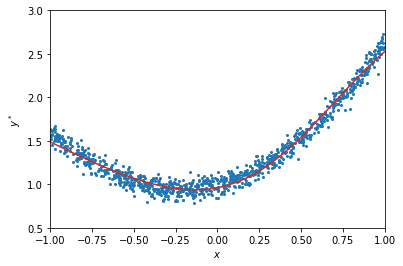

In [10]:
X = np.linspace(-1, 1, 1000).reshape(1, -1)
ones_m = np.ones((X.shape[1], 1))

Q1 = np.dot(W1, X) + np.dot(b1, ones_m.T)
Y1, dY1dQ1 = sigmoid(Q1)
        
Q2 = np.dot(W2, Y1) + np.dot(b2, ones_m.T)
Y2, dY2dQ2 = linear(Q2)

data_overplot = np.vstack((X.reshape(-1), Y2.reshape(-1))).T

_ = generate_data_for_regression(data_overplot=data_overplot)